# Introduction To Exploratory Data Analysis

## What is Exploratory Data Analysis(EDA)

Exploratoty data analysis commonly called EDA is a data analytics process to understand a given data better with the aim of making sense of the data and its underlying patterns. It helps to learn the data better using different method such as data visualizations.

It makes know the different characteristics of data. It helps to gain a better feel of our data which enables us to make Hypothesis, answer questions and check assumptions and detect anomalies in the data.

"In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task."[Source](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)

EDA does not only give us insight about our data, it also involve preprocessing of data for further analytics abd model development by removing anomalies and outliers from the data. 

- This makes data cleaner for use in machine learning processes. 

- EDA is also a source of information for making better business decisions.

## Why EDA

- Removes anomalies, outliers and unnecessary values(noise) from dataset
- Helps to prepare data for analysis

- Cleaner data equals better model results
- Helps in developing a better ML model
- Helps in choosing the best ML model to fit the data

## Before EDA

Before we begin EDA, we first need to do a couple of things. I'll classify this into two major things that need to be done.

1. Data Sourcing
2. Data Cleaning

### 1. Data Sourcing / Data Collection

Before we can analyse data we first need to have the data. The process of obtaining data is what we call, **data Sourcing**. We can source data using two major ways. **Data Sourcing is the very first step of EDA**

1. Public Data Sources:

These are data sources that we can obtain and use without any restrictions or need for special permissions. This are publicly available to any one organization to use. Some common source of public data is:

- [Data Gov](https://data.gov)
- [Data Gov UK](https://data.gov.uk)
- [Data Gov In](https://data.gov.in)
- [Kaggle](https://www.kaggle.com/)
- [UCI](https://archive.ics.uci.edu/ml/index.php)
- [Github awesome data](https://github.com/awesomedata/awesome-public-datasets)

2. Private Data Sources:

These are data sources that are private to individuals and organizations and can not be accessed by just anyone without the proper authentication and permissions. Mostly only used within the organization for its internal data analysis and model buildings.

### 2. Data Cleaning

The second step before we begin the actual EDA, we need to clean our data. Data from the field may or may not be cleaned hence we need to perform some data inspection and do some cleaning before moving on to anlyzing the data.

When it comes to data cleaning we have already looked at some of the techniques we can use to clean data.

- Missing Values
- Incorrect Format
- Incorrect Headers/column names
- Anomalies/Outliers
- Re-index rows

One thing I'll data to dealing with missing values is, the different types of missing values:

- MCAR(Missing completely at random): These values do not depend on any other features in the dataset.
- MAR(Missing at random): These values may be dependent on some other features in the dataset.
- MNAR(Missing not at random): These missing values have some reason for why they are missing from the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

[Dataset Info](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt)

In [3]:
df = pd.read_csv("datasets/housePrices2.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Dealing With Missing Values

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### $$ \text{Percentage Missing} = \frac{\text{Missing values}}{\text{Total values}} * 100 $$

In [7]:
total_missing = df.isna().sum().sort_values(ascending=False)
percentages_missing = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_df = pd.concat([total_missing, percentages_missing], axis=1, keys=["Total_Missing", "Percentages_Missing"])
missing_df.head(25)

,Total_Missing,Percentages_Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### Drop All Columns With Missing Data

In [8]:
df = df.drop(missing_df[missing_df["Total_Missing"] > 10].index,  1)

<ipython-input-8-80309375bc12>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(missing_df[missing_df["Total_Missing"] > 10].index,  1)


In [9]:
df.shape

(1460, 65)

In [10]:
df.isna().sum().max()

8

### Fill Value Before

In [11]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(method="bfill")
df["MasVnrType"] = df["MasVnrType"].fillna(method="bfill")
df["Electrical"] = df["Electrical"].fillna(method="bfill")

In [12]:
df.isna().sum().max()

0

In [13]:
df.shape

(1460, 65)

## Statistical Summary

In [14]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.680822,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.190771,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Basic Statistical Terms

- **Std(Standard Deviation):** This tells us how much our data deviates from the mean.
- **Mean:** This tells us the price of a house on average
- **The 25% percentile:**  25% of houses sell at 129975 or below
- **The 50% percentile:** 50% of the houses sell at 163000 or below
- **The 75% percentile:** 75% of the houses sell at 214000 or below
- **The max price:** The max price of a house is aroud 755000

[More About Percentile and quartile](https://www.thoughtco.com/what-is-a-quantile-3126239)

### Handling Outliers

Now that we have our data cleaned, we can move on to dealing with outliers. Outlier can be defined as **In statistics, an outlier is a data point that differs significantly from other observations** 

There are majorly two types of outliers:

1. Univariate Outliers
2. Multivariate Outliers

#### 1. Univariate Outliers

These are data points whose values lie beyond the range of expected values based on **one variable**.

#### 2. Multivariate Outliers

A multivariate outlier is an outlier in a combination of dimensions.

[Reading Source](https://www.quora.com/What-are-multivariate-outliers)

![multivariateOutlier](images/multivariateOutlier.png)

## Data Standardization

Sometimes you will want to standardize your data or a give column of your dataset to a given scale. In this section will not go over doing this.

## Data Analysis

Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making and model building purposes. There are two types of analysis:

1. **Univariate Analysis**
2. **Bivariate Analysis**
3. **Multivariate Analysis**

### 1. Univariate Analysis

The process of analysing data over a single variable, feature or column from a given dataset, it is known as **Univariate Analysis**. AKA analyze only **one variable** from a dataset.

#### Categorical Unordered Univariate Analysis:

This is a type of univariate analysis in which, the ordering of the categorical variable has not influence. Example **Gender** feature in dataset is categorically unordered, male first or female first has not importance.

#### Categorical Ordered Univariate Analysis:

This type of univariate analysis, there is a form of hierarchical ordering in the categorical datapoint. Example, **Months, Profession roles** etc..

You have many options when working with univariate data, some of these include:

- Bar Charts.
- Histograms.
- Pie Charts.
- Frequency Distribution Tables.
- Frequency Polygons.

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


##### Bar charts

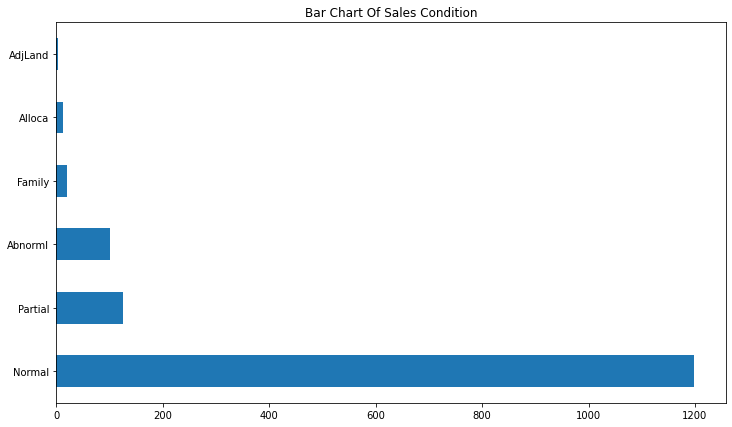

In [16]:
plt.figure(figsize=(12, 7))
df.SaleCondition.value_counts().plot.barh()
plt.title("Bar Chart Of Sales Condition")
plt.show()

##### Histogram

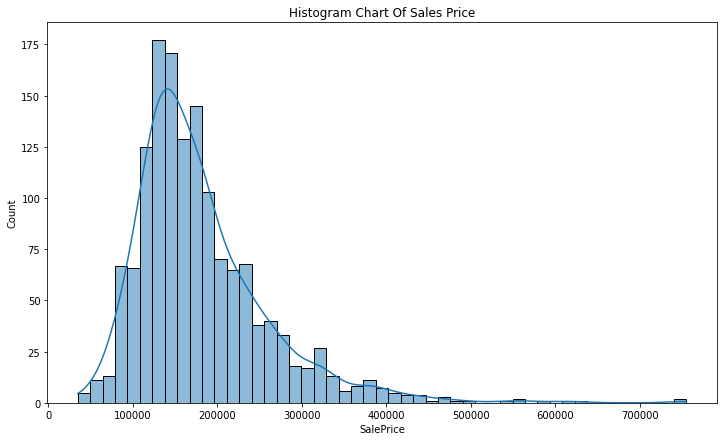

In [17]:
plt.figure(figsize=(12, 7))
sns.histplot(df.SalePrice, kde=True)
plt.title("Histogram Chart Of Sales Price")
plt.show()

In [18]:
print(f"Sale Price skewness: {df['SalePrice'].skew()}")
print(f"Sale Price kurtosis: {df['SalePrice'].kurt()}")

Sale Price skewness: 1.8828757597682129
Sale Price kurtosis: 6.536281860064529


High degree of skewness means a high degree of **outliers**.

**Standardization** means to to transform data to have a mean of **zero** and a standard deviation of **one**.

##### Pie Chart

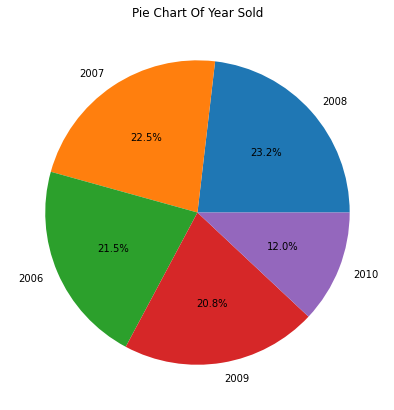

In [19]:
plt.figure(figsize=(12, 7))
plt.pie(x=df.YrSold.value_counts(), labels=df.YrSold.unique(), autopct='%1.1f%%')
plt.title("Pie Chart Of Year Sold")
plt.show()

##### Statistical Measure Univariate Analysis

In [20]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Bivariate Analysis

This is when we are analysing two variables, features or columns together specifically. This enables us to see how one feature impacts the other.

There are two major types of bivariate analysis:

1. **Numeric-Numeric Analysis:** When both variable types involved in bivariate analysis are numeric
2. **Numeric-Categorical Analysis:** When one variable types involved in bivariate analysis are numeric and the other is categorical
3. **Categorical-Categorical Analysis**: When both variable types involved in bivariate analysis are categorical types

#### Numeric-Numeric Analysis

For this type of analysis, we can use the following:

- Scatter Plot
- Correlation Matrix
- Box plots
- Pair Plots

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


##### Scatter Plot

**LotArea**: Lot size in square feet

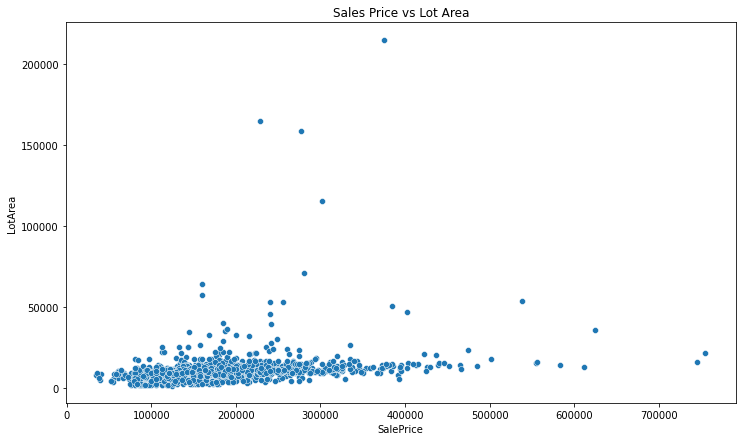

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot(y="LotArea", x="SalePrice", data=df)
plt.title("Sales Price vs Lot Area")
plt.show()

##### Pair Plots

**SalePrice**: Price at which house was sold

**OverallQual**: Rates the overall material and finish of the house

**OverallCond**: Rates the overall condition of the house

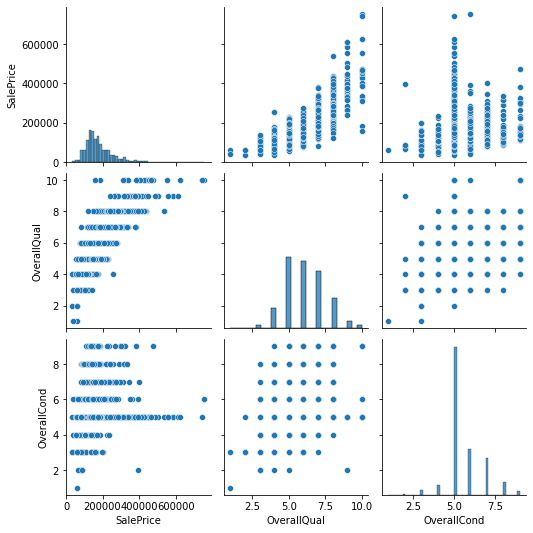

In [23]:
sns.pairplot(data=df, vars=["SalePrice", "OverallQual", "OverallCond"])
plt.show()

#### Correlation Matrix

In [24]:
df[["SalePrice", "OverallQual", "OverallCond"]].corr()

,SalePrice,OverallQual,OverallCond
SalePrice,1.000000,0.790982,-0.077856
OverallQual,0.790982,1.000000,-0.091932
OverallCond,-0.077856,-0.091932,1.000000


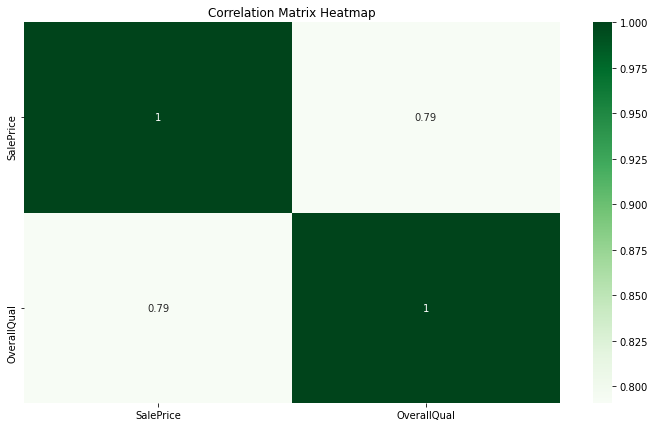

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[["SalePrice", "OverallQual"]].corr(), annot=True, cmap="Greens")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Box Plots

Box plots are based on **Quantiles**, the middle strip line is the **2nd Quantiles which is the median** of its respective column. Upper horizontal line is the max and the lower horizontal line is the min.

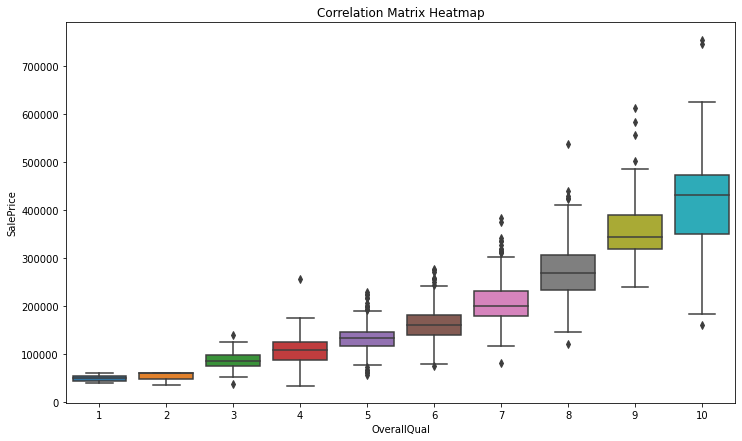

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(y="SalePrice", x="OverallQual", data=df)
plt.title("Correlation Matrix Heatmap")
plt.show()

####  Numeric - Categorical Analysis

- Bar charts
- Box plots

**RoofStyle**: Type of roof

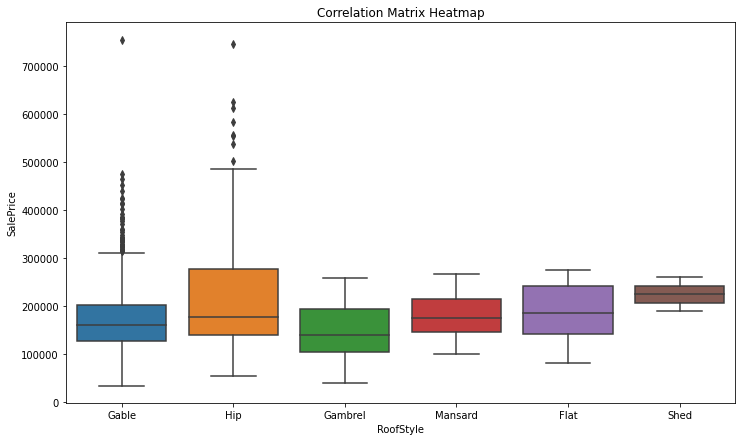

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(y="SalePrice", x="RoofStyle", data=df)
plt.title("Correlation Matrix Heatmap")
plt.show()

####  Category - Categorical Analysis

- Bar charts
- Box plots

**RoofStyle**: Type of roof

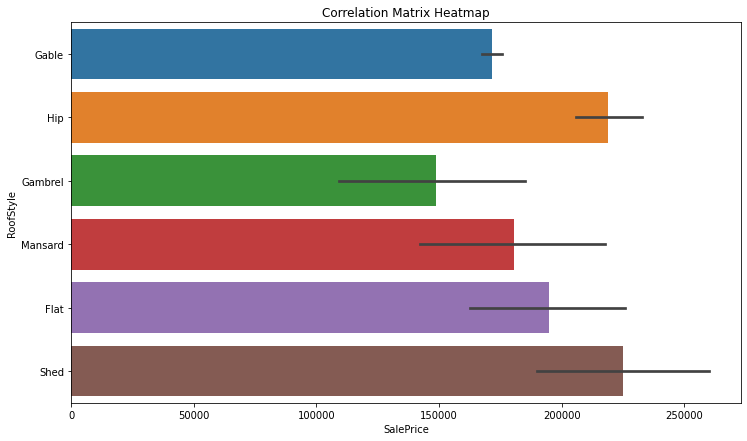

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(y="RoofStyle", x="SalePrice", data=df)
plt.title("Correlation Matrix Heatmap")
plt.show()

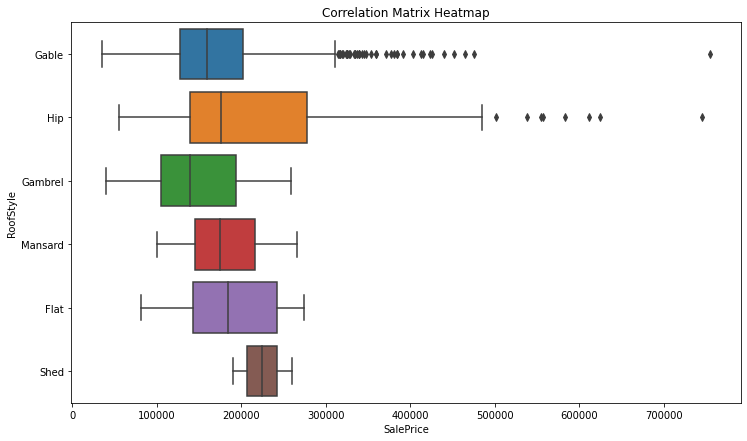

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(y="RoofStyle", x="SalePrice", data=df)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Multivariate Analysis

In multivariate analysis, we work with more than two variables, feature or columns.

- PairPlot
- Heatmaps / correlation matrix

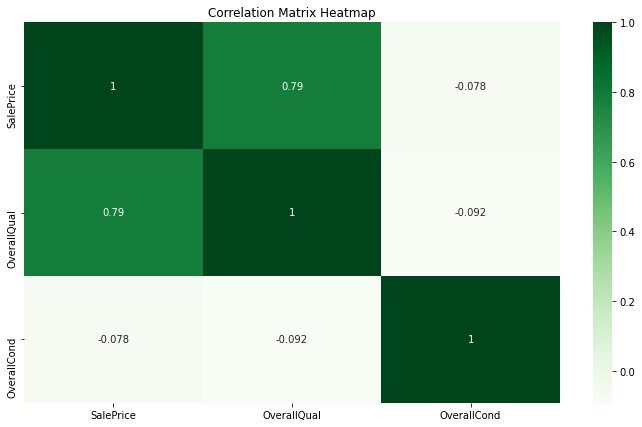

In [30]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[["SalePrice", "OverallQual", "OverallCond"]].corr(), annot=True, cmap="Greens")
plt.title("Correlation Matrix Heatmap")
plt.show()

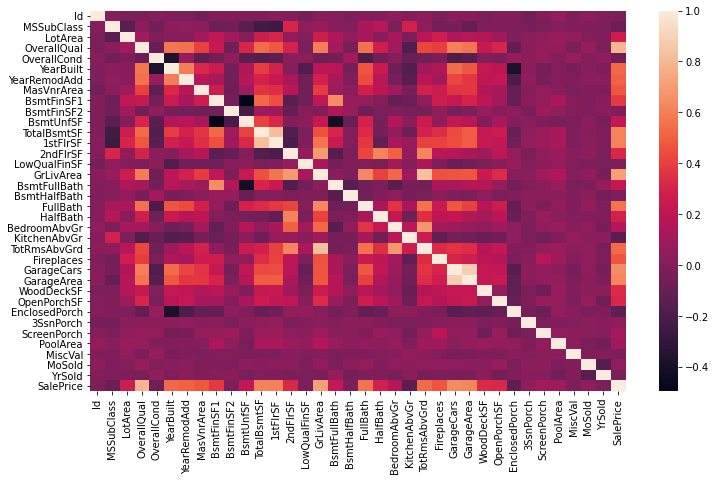

In [31]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr())
plt.show()

Heatmaps are a great way to understand multi-collinearity and how to drop multi-collinearity features since they give the same information.

Lets take a look at the 10 most features that correlate with the SalePrice

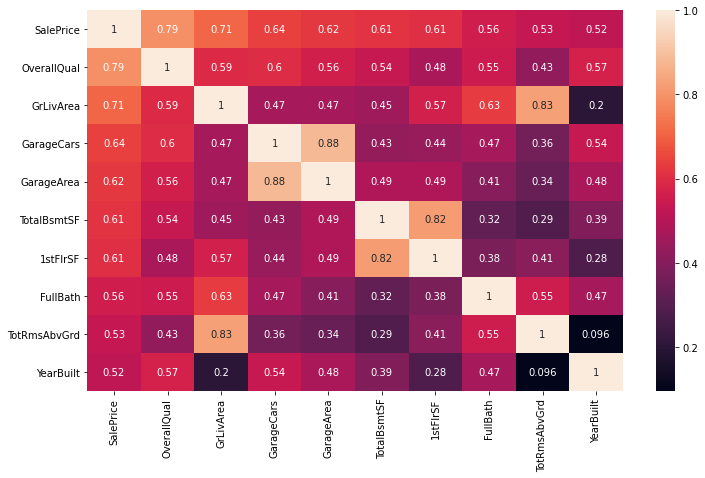

In [32]:
cols = df.corr().nlargest(10, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

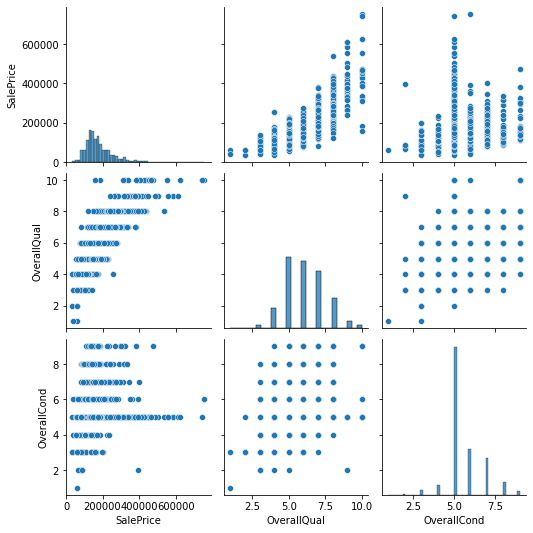

In [33]:
sns.pairplot(data=df, vars=["SalePrice", "OverallQual", "OverallCond"])
plt.show()

In [34]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt'], dtype=object)

**YearBuilt**: Original construction date

**TotalBsmtSF**: Total square feet of basement area

**GrLivArea**: Above grade (ground) living area square feet

**GarageArea**: Size of garage in square feet

**GarageCars**: Size of garage in car capacity

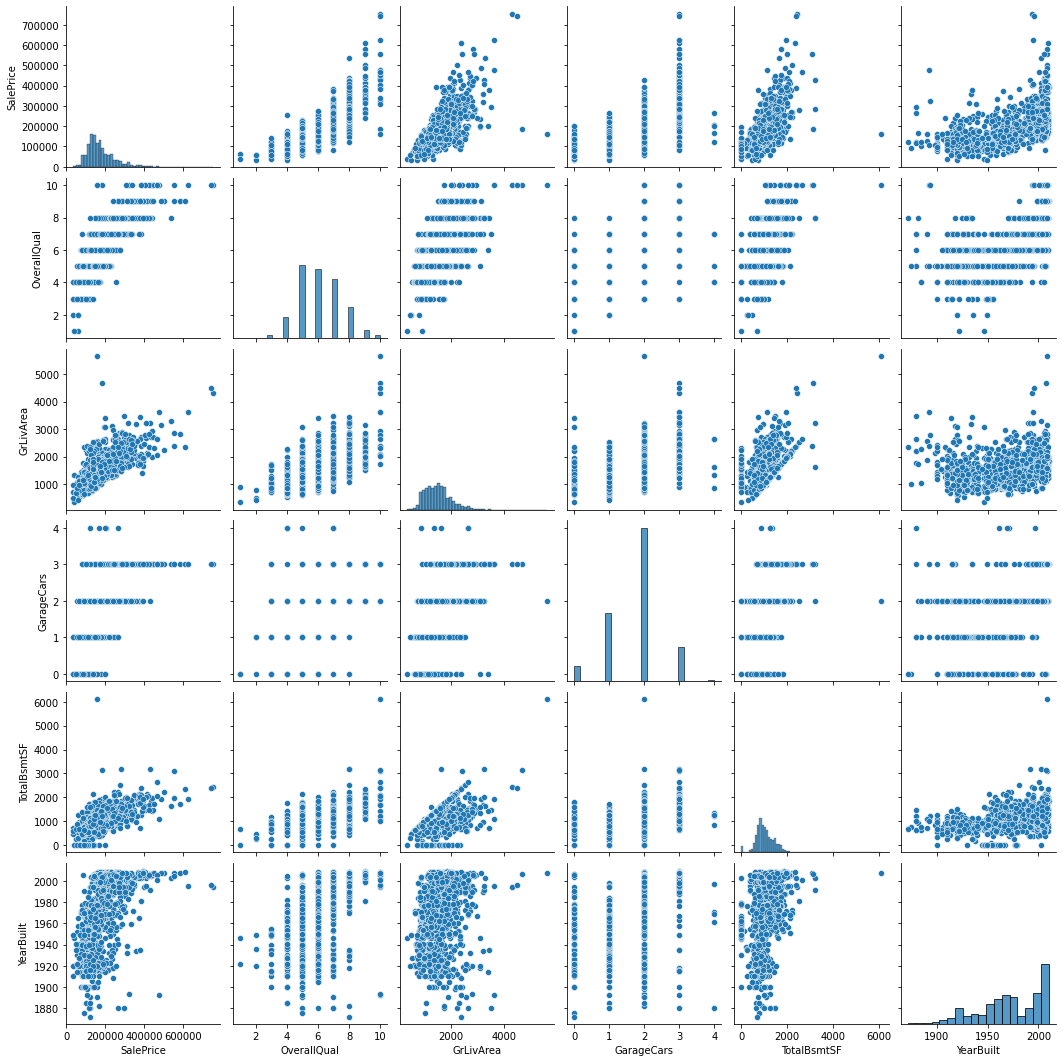

In [35]:
cols = ["SalePrice", 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt']
sns.pairplot(df[cols])
plt.show()

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another.

Based on the heat map, I think the data consists of some multicollinearity. Its go ahead and check that.

### Problems with multicollinearity

The problem with multicollinearity is that, it prevents us from seeing the impact of one particular feature on the prediction(result).

### $$ y = b + m_1x_1 + m_2x_2 $$

### What causes Multicollinearity?

- When new variables are created which are dependent on other variables
- Having identical variables in the dataset, distance data in different units, one in km another in miles
- When we haev insufficient data in some cases can also cause multicollinearity problems
- Inaccurate use of dummy variables can also cause a multicollinearity problem(**Dummy variable trap**)

### Detecting Multicollinearity using Value Inflation Factor(VIF)

VIF score of an independent variable represents how well the variable is explained by other independent variable**s**

### $$ VIF = \frac{1}{1-R^2} $$

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif_calc_df = df[['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt']]

In [38]:
vif_df = pd.DataFrame()

vif_df["Columns"] = vif_calc_df.columns
vif_df["VIF"] = [variance_inflation_factor(vif_calc_df.values, i) for i in range(vif_calc_df.shape[1])]

In [39]:
vif_df

,Columns,VIF
0,OverallQual,44.718362
1,GrLivArea,15.258650
2,GarageCars,10.799932
3,TotalBsmtSF,10.176010
4,YearBuilt,22.274153


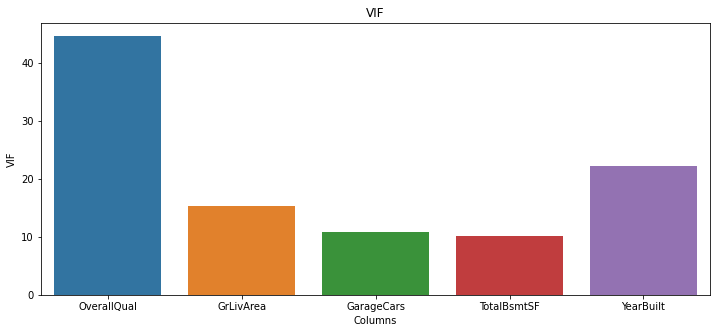

In [40]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Columns", y="VIF", data=vif_df)
plt.title("VIF")
plt.show()

#### Interpreting VIF

- VIF starts at 1 and has no upper limit
- If VIF is 1 that means, there is no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## How To Fix Multicollinearity

One easy way is to drop the some of the columns that are multicollinearly related.